In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import string

import spacy
import re
import string
spacy.load('en')
nlp = spacy.load("en")

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 

def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [2]:
# Movie 1 - An Inconvenient Truth #

## Grab text, and parse ##
url = 'https://archive.org/stream/AnInconvenientTruth_201607/An%20Inconvenient%20Truth_djvu.txt' 

response = requests.get(url)

page = response.text
soup = BeautifulSoup(page, "lxml")

movie1_text = soup.find('div', {"class": "container container-ia"}).find('pre').text
movie1 = movie1_text.partition('http://arakanindobhasaa.blogspot.com/')[2].partition('Download Film \n\nhttp://rarbg.com/torrents/filmi/download/2d800b47328044b65bc3641cc98c0f78d4650b81/torren')[0]
movie1 = movie1.replace('\n', '').replace("\'", "'")
movie1 = movie1.lower()

# Replace all A1's with AL so that AL GORE shows up
movie1 = movie1.replace("a1", "al")
movie1 = movie1.replace("global warming", "globalwarming")
movie1 = movie1.replace("al gore", "algore")
movie1 = movie1.replace("donald trump", "donaldtrump")
movie1 = movie1.replace("climate change", "climatechange")
movie1 = movie1.replace("global warming", "globalwarming")

## Create List of Sentences ##
doc = nlp(movie1)
# doc.sents is a generator that yields sentence spans
doc_list = [sent.text for sent in doc.sents]
# ['This is a sentence.', 'This is another one.']

# Make everything lowercase
#doc_list_edit = [sentence.lower() for sentence in doc_list]

# Remove Numbers
doc_list_edit = [re.sub(r'\d+', '', sentence) for sentence in doc_list]

# Remove Punctuation
translator = str.maketrans('', '', string.punctuation)
movie1_list = [sentence.translate(translator) for sentence in doc_list_edit]

In [3]:
# Movie 2 - An Inconvenient Sequel: Truth to Power #

## Grab text, and parse ##
url2 = 'https://springfieldspringfield.co.uk/movie_script.php?movie=an-inconvenient-sequel-truth-to-power' 
response2 = requests.get(url2)

page2 = response2.text
soup2 = BeautifulSoup(page2, "lxml")

movie2_text = soup2.find('div', {"class": "scrolling-script-container"}).text
movie2 = movie2_text.replace('\n', '').replace("\'", "'")
movie2 = movie2.lower()

# Replace some strings
movie2 = movie2.replace("a1", "al")
movie2 = movie2.replace("global warming", "globalwarming")
movie2 = movie2.replace("al gore", "algore")
movie2 = movie2.replace("donald trump", "donaldtrump")
movie2 = movie2.replace("climate change", "climatechange")
movie2 = movie2.replace("global warming", "globalwarming")

## Create List of Sentences ##
doc2 = nlp(movie2)
# doc.sents is a generator that yields sentence spans
doc_list2 = [sent.text for sent in doc2.sents]
# ['This is a sentence.', 'This is another one.']

# Make everything lowercase
#doc_list_edit2 = [sentence.lower() for sentence in doc_list2]

# Remove Numbers
doc_list_edit2 = [re.sub(r'\d+', '', sentence) for sentence in doc_list2]

# Remove Punctuation
translator = str.maketrans('', '', string.punctuation)
movie2_list = [sentence.translate(translator) for sentence in doc_list_edit2]

# Playing around with stop words

In [4]:
df_stop = pd.read_csv("/Users/JacKuo14/Documents/Metis/course_work/project04_climate/news-stopwords/sw1k.csv")
df_stop['ratio'] = df_stop['frequency'] / df_stop['presence']
df_stop = df_stop.sort_values(by = 'ratio', ascending = False).reset_index(drop = True)
news_stop_list = df_stop['term'].to_list()

In [5]:
## Topic Modeling ##

movie_list_full = movie1_list + movie2_list

more_stop_words = ['lot', 'dont', 'im', 'didnt', 'hey', 'lets', 'itll', 'yeah', 'heres', 'theyre', 'youre', 'said', 'went', 'came', 'look', 'gone', 'gonna', 'actually', 'really', 'like', 'just', 'thats', 'theres', 'used', 'oh', 'uh', 'ive']
stop_words_full = text.ENGLISH_STOP_WORDS.union(more_stop_words + news_stop_list)

# Count Vectorizing #
vectorizer = CountVectorizer(stop_words = stop_words_full, min_df = 5, max_df = .3)
fit_doc = vectorizer.fit_transform(movie_list_full)
df_doc = pd.DataFrame(fit_doc.toarray(), columns = vectorizer.get_feature_names())

num = 7

## NMF ##
nmf_model = NMF(num)
doc_topic = nmf_model.fit_transform(fit_doc)

component_list = ["component_" + str(val) for val in range(1, num+1)]

topic_word = pd.DataFrame(nmf_model.components_.round(num),
             index = component_list, columns = vectorizer.get_feature_names())
#topic_word3

In [105]:
display_topics(nmf_model, vectorizer.get_feature_names(), 50)



Topic  0
ice, ocean, floating, shelf, arctic, cap, formed, difference, glacier, antarctica, mass, greenland, raise, relatively, scientists, measured, measure, surface, friend, warmer, cold, theyve, planet, patterns, feet, melting, completely, effect, glaciers, warm, cities, absolutely, parts, massive, warming, sort, conditions, greenhouse, scientific, temperature, northern, pattern, wind, sea, atlantic, temperatures, heat, whats, happening, isnt

Topic  1
earth, picture, planet, sun, keeps, atmosphere, ability, temperature, apollo, balance, earths, looked, blue, completely, cities, civilization, friend, relatively, welcome, generation, environment, melting, satellite, bush, effect, mass, surface, thinking, remember, pattern, century, deep, burning, brings, formed, scientists, climatechange, paris, layer, vice, environmental, climate, consequences, alltime, worse, population, warm, arctic, patterns, science

Topic  2
movement, environmental, picture, moral, solve, apollo, crisis, remem

In [104]:
H.head()


,ice,earth,movement,globalwarming,climate,solar,atmosphere,topic,movie
you look at that river,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,none,1
gently flowing by,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,none,1
you notice the leaves rustling with the wind,0.0,0.0,0.0,0.0,0.00000,0.17305,0.00000,solar,1
you hear the birds,0.0,0.0,0.0,0.0,0.00224,0.00773,0.00497,solar,1
you hear the tree frogs,0.0,0.0,0.0,0.0,0.00224,0.00773,0.00497,solar,1


# Comparing Global Warming with Climate Change

In [205]:
H2 = pd.DataFrame(doc_topic.round(7), index = movie_list_full, columns = component_list)

# Add Movie Column
m1_len = [1] * len(movie1_list)
m2_len = [2] * len(movie2_list)
m12_len = m1_len + m2_len
H2['movie'] = m12_len


In [208]:
H2.sort_values(by = 'component_5', ascending = False)[:10]


,component_1,component_2,component_3,component_4,component_5,component_6,component_7,movie
you know anybody who decides to be a part of helping to solve the climate crisis has a constant struggle between hope and despair,0.0,0.0,0.016490,0.00000,0.597418,0.000000,0.0,2
i do my best to speak for the public interest in solving the climate crisis,0.0,0.0,0.000000,0.00000,0.596754,0.000000,0.0,2
if we increase the fraction of that that we harvest and use productively then we can solve that part of the climate crisis,0.0,0.0,0.016817,0.00000,0.580822,0.000000,0.0,2
this movement to solve the climate crisis is in the tradition of every great moral movement that has advanced the cause of humankind,0.0,0.0,0.883837,0.00020,0.579156,0.000000,0.0,2
we had a real opportunity to start building enough public support to really get on track to solving the climate crisis,0.0,0.0,0.000000,0.00000,0.577852,0.000000,0.0,2
as you know i have this passion for solving the climate crisis that goes back years,0.0,0.0,0.000000,0.00000,0.577852,0.000000,0.0,2
it is frustrating that for many years ive tried to communicate that weve got to act on the climate crisis,0.0,0.0,0.000000,0.00000,0.554441,0.000000,0.0,2
every storm is different now because of the climate crisis,0.0,0.0,0.000000,0.01492,0.549101,0.006171,0.0,2
what a blessing it was that pope francis came to tacloban to the ground zero of that tragedy and delivered a very powerful message that the gravest effects of the climate crisis are visited upon the poorest people,0.0,0.0,0.000000,0.00000,0.547300,0.000000,0.0,2
sometimes it seems to me that the climate crisis is simply not getting the kind of coverage in the media that it should,0.0,0.0,0.000000,0.00000,0.533175,0.000000,0.0,2


In [248]:
H2.sort_values(by = 'component_6', ascending = False)[:15]

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,movie
and it resulted in the largest solar loan in the history of the world to help india move forward more quickly in its installation of solar,0.0,0.00000,0.0,0.000000,0.000000,0.725333,0.000000,2
but in many parts of china it is already cheaper to get electricity from solar and wind,0.0,0.00000,0.0,0.000000,0.000000,0.619793,0.028547,2
well in the us in calendar year uh if you look at the investments in the us in the building of new uh electric generating capacity threequarters is from solar and wind,0.0,0.00000,0.0,0.000000,0.000000,0.535777,0.000000,2
pennsylvanias exercising leadership on solar power and wind power,0.0,0.00000,0.0,0.000000,0.000000,0.535777,0.000000,1
and we want to create jobs in solar and wind and efficiency,0.0,0.00000,0.0,0.000000,0.000000,0.535777,0.000000,2
when india goes to borrow money to build solar farms or wind farms they have to pay plus an fx uncertainty,0.0,0.00000,0.0,0.000000,0.000000,0.535777,0.000000,2
so my narrow interest is a way around these high interest rates that the indians are so concerned about in deploying solar and wind,0.0,0.00000,0.0,0.000000,0.000000,0.535777,0.000000,2
fourteen years ago the best projections available were that we would be able to install worldwide one gigawatt of solar electricity per year,0.0,0.00000,0.0,0.009817,0.000000,0.437431,0.021461,2
and one was the crucial earlywarning device for solar storms that threaten electric utility grids and pipelines,0.0,0.00000,0.0,0.007897,0.000000,0.430064,0.000000,2
and they have lobbied the state legislature to basically make it illegal to lease a solar panel for your rooftop from anybody but the fossil fuelburning utility,0.0,0.00000,0.0,0.000000,0.000000,0.428592,0.000000,2


# High Level, how much of each topic exists in each movie

In [111]:
df = H.groupby('movie').sum().round(1)

In [113]:
df.sum(axis=0)

ice              24.4
earth            15.7
movement          7.3
globalwarming    20.0
climate          21.4
solar            16.8
atmosphere       19.9
dtype: float64

In [125]:
df2 = df.div(df.sum(axis=0), axis=1).round(2).transpose().reset_index().rename(columns = {'index' : 'topic', 1: 'Inconvenient Truth', 2: 'Inconvenient Sequel'})
df2

movie,topic,Inconvenient Truth,Inconvenient Sequel
0,ice,0.86,0.14
1,earth,0.69,0.31
2,movement,0.12,0.88
3,globalwarming,0.66,0.34
4,climate,0.16,0.84
5,solar,0.20,0.80
6,atmosphere,0.67,0.33


In [129]:
df1 = df.div(df.sum(axis=0), axis=1).round(2)
df1['ice'].transpose()

movie
1    0.86
2    0.14
Name: ice, dtype: float64

In [150]:
df3 = df2.sort_values(by = 'Inconvenient Truth', ascending = False)

In [155]:
df3

movie,topic,Inconvenient Truth,Inconvenient Sequel
0,ice,0.86,0.14
1,earth,0.69,0.31
6,atmosphere,0.67,0.33
3,globalwarming,0.66,0.34
5,solar,0.20,0.80
4,climate,0.16,0.84
2,movement,0.12,0.88


In [190]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rcParams

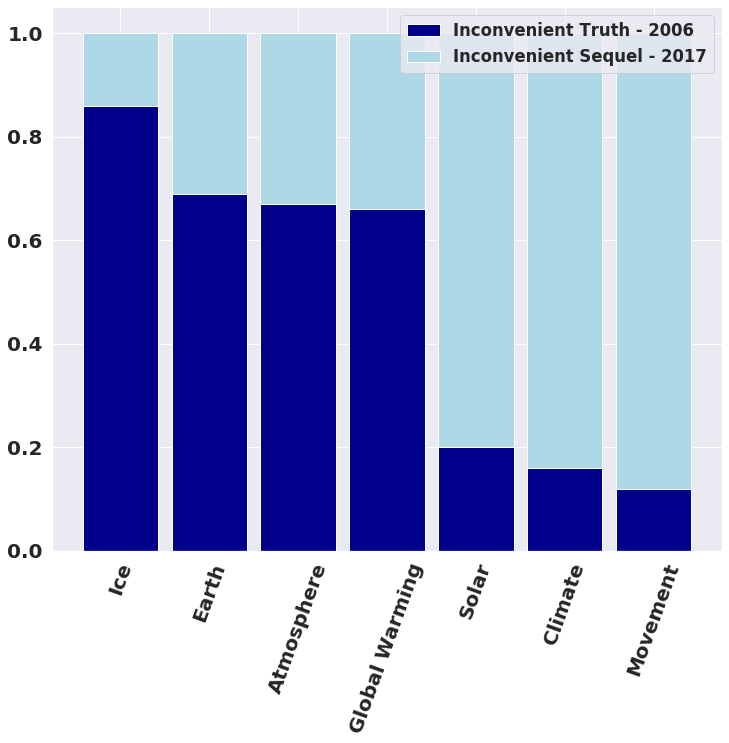

<Figure size 432x288 with 0 Axes>

In [191]:
# plot

figure(num=None, figsize=(12, 10)) #dpi=80, facecolor='w', edgecolor='k')

barWidth = 0.85
names = ('Ice', 'Earth', 'Atmosphere', 'Global Warming', 'Solar', 'Climate', 'Movement')
r = [0, 1, 2, 3, 4, 5, 6]
# Create green Bars
plt.bar(r, df3['Inconvenient Truth'], color= '#00008b', edgecolor='white', width=barWidth, label = 'Inconvenient Truth - 2006')
# Create orange Bars
plt.bar(r, df3['Inconvenient Sequel'], bottom=df3['Inconvenient Truth'], color='#add8e6', edgecolor='white', width=barWidth, label = 'Inconvenient Sequel - 2017')
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)

#font = {'size'   : 25}
rcParams['mathtext.default'] = 'regular'
plt.xticks(size = 20)
plt.yticks(size = 20)

# Custom x axis
plt.xticks(r, names, rotation=70)
#plt.xlabel("group")
 
# Show graphic
plt.legend()
plt.show()
plt.savefig('topic_movie_comparison.png')


In [ ]:
figure(num=None, figsize=(12, 10)) #dpi=80, facecolor='w', edgecolor='k')

barWidth = 0.85
names = ('Ice', 'Earth', 'Atmosphere', 'Global Warming', 'Solar', 'Climate', 'Movement')
r = [0, 1, 2, 3, 4, 5, 6]
# Create green Bars
plt.bar(r, df['Inconvenient Truth'], color= '#00008b', edgecolor='white', width=barWidth, label = 'Inconvenient Truth - 2006')
# Create orange Bars
plt.bar(r, df['Inconvenient Sequel'], bottom=df['Inconvenient Truth'], color='#add8e6', edgecolor='white', width=barWidth, label = 'Inconvenient Sequel - 2017')
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names, rotation=70)
#plt.xlabel("group")
 
# Show graphic
plt.legend()
plt.show()

In [174]:
df.transpose().reset_index().rename(columns = {'index' : 'topic', 1: 'Inconvenient Truth', 2: 'Inconvenient Sequel'}).sort_values(by = 'Inconvenient Truth', ascending = False)

movie,topic,Inconvenient Truth,Inconvenient Sequel
0,ice,20.9,3.5
6,atmosphere,13.4,6.5
3,globalwarming,13.1,6.9
1,earth,10.8,4.9
4,climate,3.4,18.0
5,solar,3.4,13.4
2,movement,0.9,6.4


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


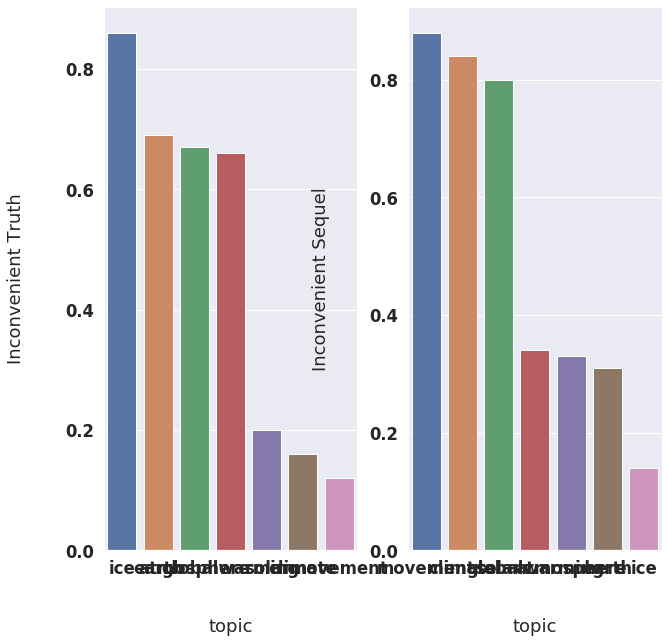

In [188]:
fig, ax = plt.subplots(1,2, figsize=(10,10))
sns.barplot(x = 'topic', y = 'Inconvenient Truth', data = df2.sort_values(by = 'Inconvenient Truth', ascending = False), ax=ax[0])
sns.barplot(x = 'topic', y = 'Inconvenient Sequel', data = df2.sort_values(by = 'Inconvenient Sequel', ascending = False), ax=ax[1])
fig.show()



#sns.barplot(x = 'topic', y = 'Inconvenient Truth', data = df2)
#sns.barplot(x = 'topic', y = 'Inconvenient Sequel', data = df2)

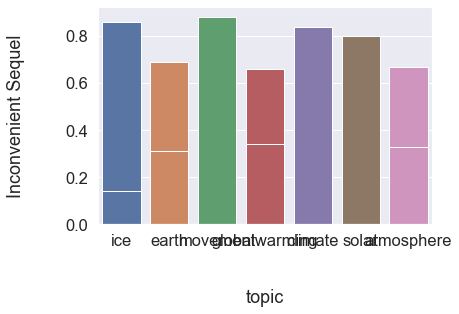

In [143]:
sns.barplot(x = 'topic', y = 'Inconvenient Truth', data = df2)
sns.barplot(x = 'topic', y = 'Inconvenient Sequel', data = df2)

In [ ]:
fig, ax1 = pyplot.subplots(figsize=(10, 10))
tidy = df.melt(id_vars='topic').rename(columns=str.title)
seaborn.barplot(x='Topic', y='Value', hue='Variable', data=tidy, ax=ax1)

In [118]:
df_test = pd.DataFrame({
    'Factor': ['Growth', 'Value'],
    'Weight': [0.10, 0.20],
    'Variance': [0.15, 0.35]
})
df_test

,Factor,Weight,Variance
0,Growth,0.1,0.15
1,Value,0.2,0.35


In [ ]:
df_test = pandas.DataFrame({
    'Factor': ['Growth', 'Value'],
    'Weight': [0.10, 0.20],
    'Variance': [0.15, 0.35]
})
fig, ax1 = pyplot.subplots(figsize=(10, 10))
tidy = df.melt(id_vars='Factor').rename(columns=str.title)
seaborn.barplot(x='Factor', y='Value', hue='Variable', data=tidy, ax=ax1)
seaborn.despine(fig)

In [141]:
df.head()


,component_1,component_2,component_3,component_4,component_5,component_6,component_7
movie,,,,,,,
1,20.916418,10.892435,0.913550,13.093958,3.428364,3.397908,13.378412
2,3.452632,4.957344,6.354202,6.863985,17.987741,13.394337,6.474320


In [128]:
H2.shape

(1900, 8)

# Count of each Category in each movie

In [9]:
H = pd.DataFrame(doc_topic.round(5), index = movie_list_full, columns = component_list)

H = H.rename(columns = {"component_1": "ice", 
                                     "component_2": "earth", 
                                     "component_3": "movement", 
                                     "component_4": "globalwarming", 
                                     "component_5": "climate", 
                                     "component_6": "solar", "component_7": "atmosphere"})


#H['topic'] = H.idxmax(axis=0)
H.head()


,ice,earth,movement,globalwarming,climate,solar,atmosphere
you look at that river,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000
gently flowing by,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000
you notice the leaves rustling with the wind,0.0,0.0,0.0,0.0,0.00000,0.17305,0.00000
you hear the birds,0.0,0.0,0.0,0.0,0.00224,0.00773,0.00497
you hear the tree frogs,0.0,0.0,0.0,0.0,0.00224,0.00773,0.00497


In [103]:
H.sort_values(by = 'solar', ascending = False)

,ice,earth,movement,globalwarming,climate,solar,atmosphere,topic,movie
and it resulted in the largest solar loan in the history of the world to help india move forward more quickly in its installation of solar,0.00000,0.0,0.0,0.00000,0.0,0.72518,0.00000,solar,2
but in many parts of china it is already cheaper to get electricity from solar and wind,0.00000,0.0,0.0,0.00000,0.0,0.61964,0.02857,solar,2
pennsylvanias exercising leadership on solar power and wind power,0.00000,0.0,0.0,0.00000,0.0,0.53564,0.00000,solar,1
so my narrow interest is a way around these high interest rates that the indians are so concerned about in deploying solar and wind,0.00000,0.0,0.0,0.00000,0.0,0.53564,0.00000,solar,2
and we want to create jobs in solar and wind and efficiency,0.00000,0.0,0.0,0.00000,0.0,0.53564,0.00000,solar,2
...,...,...,...,...,...,...,...,...,...
and you know the number of those that disagreed with the scientific consensus that were causing globalwarming and that its a serious problem,0.00054,0.0,0.0,0.40934,0.0,0.00000,0.00000,globalwarming,1
and they took a big sample of articles,0.00000,0.0,0.0,0.00000,0.0,0.00000,0.00000,none,1
there was a massive study of every scientific article in a peerreviewed journal written on globalwarming for the last years,0.00384,0.0,0.0,0.42051,0.0,0.00000,0.00000,globalwarming,1
actually not really,0.00000,0.0,0.0,0.00000,0.0,0.00000,0.00000,none,1


In [11]:
topic_list = []
for row, col in H.iterrows():
    #print(type(col))
    #if col == pd.Series([0, 0, 0, 0, 0, 0, 0]):
    if (col == 0).all():
        topic_list.append('none')
    else:
        topic_list.append(col[col == col.max()].index[0])
    #print(col)
#H['topic'] = topic_list
    

In [13]:
H['topic'] = topic_list

In [14]:
H.head()

,ice,earth,movement,globalwarming,climate,solar,atmosphere,topic
you look at that river,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,none
gently flowing by,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,none
you notice the leaves rustling with the wind,0.0,0.0,0.0,0.0,0.00000,0.17305,0.00000,solar
you hear the birds,0.0,0.0,0.0,0.0,0.00224,0.00773,0.00497,solar
you hear the tree frogs,0.0,0.0,0.0,0.0,0.00224,0.00773,0.00497,solar


In [15]:
# Add Movie Column
m1_len = [1] * len(movie1_list)
m2_len = [2] * len(movie2_list)
m12_len = m1_len + m2_len
H['movie'] = m12_len

H.head()

,ice,earth,movement,globalwarming,climate,solar,atmosphere,topic,movie
you look at that river,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,none,1
gently flowing by,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,none,1
you notice the leaves rustling with the wind,0.0,0.0,0.0,0.0,0.00000,0.17305,0.00000,solar,1
you hear the birds,0.0,0.0,0.0,0.0,0.00224,0.00773,0.00497,solar,1
you hear the tree frogs,0.0,0.0,0.0,0.0,0.00224,0.00773,0.00497,solar,1


In [180]:
# Table showing how much more of each category there is in each
H.groupby('movie')['topic'].value_counts()

movie  topic        
1      none             455
       atmosphere       135
       ice               82
       globalwarming     67
       earth             61
       solar             52
       climate           46
       movement           7
2      none             571
       climate          119
       atmosphere       112
       solar             79
       earth             43
       globalwarming     41
       ice               19
       movement          11
Name: topic, dtype: int64

In [280]:
print(len(movie1_list))
print(len(movie2_list))

905
995


In [8]:

#H[H['topic'] == 'none'][-20:]

# Percentage amounts of each category in every row

In [228]:
H.head()

,ice,earth,movement,globalwarming,climate,solar,atmosphere,topic,movie
you look at that river,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,none,1
gently flowing by,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,none,1
you notice the leaves rustling with the wind,0.0,0.0,0.0,0.0,0.00000,0.17310,0.00000,solar,1
you hear the birds,0.0,0.0,0.0,0.0,0.00224,0.00773,0.00497,solar,1
you hear the tree frogs,0.0,0.0,0.0,0.0,0.00224,0.00773,0.00497,solar,1


# Timestamp

In [18]:
movie1_time = H[H['movie'] == 1]



In [19]:
# Inconvenient Truth
# An Inconvenient Truth is: 118 minutes, 7080 seconds
# Each "document" is around 7080/905 seconds, or 7.8 seconds

time_list = []

seconds = 0

for doc in range(0, len(movie1_time)):
    seconds += 7080/905
    time_list.append(round(seconds, 2))

movie1_time = H[H['movie'] == 1]
movie1_time['time'] = time_list
movie1_time['percent_time'] = [round(time/7080, 3)*100 for time in time_list]
movie1_time.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,ice,earth,movement,globalwarming,climate,solar,atmosphere,topic,movie,time,percent_time
you look at that river,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,none,1,7.82,0.1
gently flowing by,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,none,1,15.65,0.2
you notice the leaves rustling with the wind,0.0,0.0,0.0,0.0,0.00000,0.17305,0.00000,solar,1,23.47,0.3
you hear the birds,0.0,0.0,0.0,0.0,0.00224,0.00773,0.00497,solar,1,31.29,0.4
you hear the tree frogs,0.0,0.0,0.0,0.0,0.00224,0.00773,0.00497,solar,1,39.12,0.6


In [20]:
def return_topic(df):
    
    if len(df['topic'].value_counts()) == 1:
        return(df['topic'].value_counts().index[0])
    
    elif df['topic'].value_counts().index[0] == 'none':
        return(df['topic'].value_counts().index[1])
    
    else:
        return(df['topic'].value_counts().index[0])

In [21]:
top_row = 0
bottom_row = 5

agg_topic_list = []

for df in range(0, 181):
    topic = return_topic(movie1_time.iloc[top_row:bottom_row, :])
    
    agg_topic_list.extend([topic] * 5)
    
    top_row += 5
    bottom_row += 5

In [27]:
#movie1_time['smoothed_group'].value_counts()

In [22]:
movie1_time['smoothed_group'] = agg_topic_list
movie1_time.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ice,earth,movement,globalwarming,climate,solar,atmosphere,topic,movie,time,percent_time,smoothed_group
you look at that river,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,none,1,7.82,0.1,solar
gently flowing by,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,none,1,15.65,0.2,solar
you notice the leaves rustling with the wind,0.0,0.0,0.0,0.0,0.00000,0.17305,0.00000,solar,1,23.47,0.3,solar
you hear the birds,0.0,0.0,0.0,0.0,0.00224,0.00773,0.00497,solar,1,31.29,0.4,solar
you hear the tree frogs,0.0,0.0,0.0,0.0,0.00224,0.00773,0.00497,solar,1,39.12,0.6,solar


In [178]:
movie1_time['smoothed_group'].value_counts()

atmosphere       250
ice              200
earth            120
climate           95
solar             95
globalwarming     70
none              65
movement          10
Name: smoothed_group, dtype: int64

In [179]:
movie2_time['smoothed_group'].value_counts()

climate          320
atmosphere       195
solar            160
earth            110
globalwarming     80
none              75
ice               30
movement          25
Name: smoothed_group, dtype: int64

In [23]:
topics = list(movie1_time.smoothed_group.value_counts().index)
cumcounts = np.zeros((len(topics),len(movie1_time)))

## Vinny's amazing code that counts
for i in range(len(movie1_time)):
    cumcounts[:,i] = cumcounts[:,i-1]
    k = topics.index(movie1_time.smoothed_group[i])
    cumcounts[k,i]+=1

# cumcounts[2,200]

In [100]:
import seaborn as sns
sns.set(font_scale = 1.5)
import matplotlib.pyplot as plt
%matplotlib inline

#sns.set_style("whitegrid", {'axes.grid' : False, 'axes.facecolor':'white'} )

[Text(0, 0.5, 'Number of Sentences'), Text(0.5, 0, 'Percentage Through Movie')]

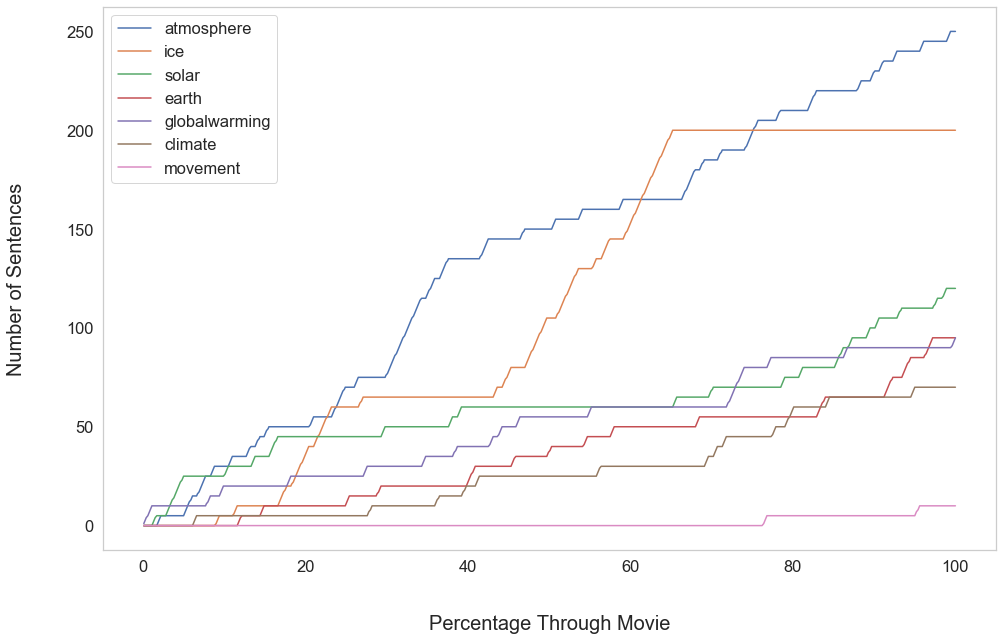

In [99]:
plt.figure(figsize=(16, 10))

ax = sns.lineplot(x = movie1_time['percent_time'], y = cumcounts[0], label = 'atmosphere')
ax = sns.lineplot(x = movie1_time['percent_time'], y = cumcounts[1], label = 'ice')
ax = sns.lineplot(x = movie1_time['percent_time'], y = cumcounts[2], label = 'solar')
ax = sns.lineplot(x = movie1_time['percent_time'], y = cumcounts[3], label = 'earth')
ax = sns.lineplot(x = movie1_time['percent_time'], y = cumcounts[4], label = 'globalwarming')
ax = sns.lineplot(x = movie1_time['percent_time'], y = cumcounts[5], label = 'climate')
#ax = sns.lineplot(x = movie1_time['percent_time'], y = cumcounts[6], label = 'none')
ax = sns.lineplot(x = movie1_time['percent_time'], y = cumcounts[7], label = 'movement')

plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.labelpad'] = 40 
ax.set(xlabel='Percentage Through Movie', ylabel='Number of Sentences')

#ax.grid(False)
#sns.despine(bottom = True, left = True);
#ax.right_ax(False);

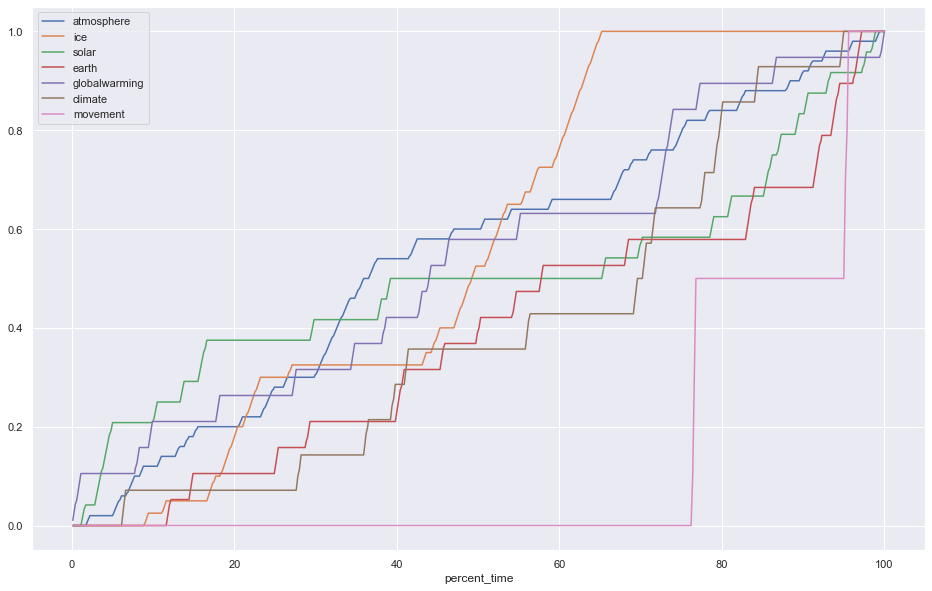

In [35]:
plt.figure(figsize=(16, 10))
ax2 = sns.lineplot(x = movie1_time['percent_time'], y = cumcounts[0]/cumcounts[0,-1], label = 'atmosphere')
ax2 = sns.lineplot(x = movie1_time['percent_time'], y = cumcounts[1]/cumcounts[1,-1], label = 'ice')
ax2 = sns.lineplot(x = movie1_time['percent_time'], y = cumcounts[2]/cumcounts[2,-1], label = 'solar')
ax2 = sns.lineplot(x = movie1_time['percent_time'], y = cumcounts[3]/cumcounts[3,-1], label = 'earth')
ax2 = sns.lineplot(x = movie1_time['percent_time'], y = cumcounts[4]/cumcounts[4,-1], label = 'globalwarming')
ax2 = sns.lineplot(x = movie1_time['percent_time'], y = cumcounts[5]/cumcounts[5,-1], label = 'climate')
#ax2 = sns.lineplot(x = movie1_time['percent_time'], y = cumcounts[6]/cumcounts[6,-1], label = 'none')
ax2 = sns.lineplot(x = movie1_time['percent_time'], y = cumcounts[7]/cumcounts[7,-1], label = 'movement')

In [26]:
#cumcounts[5]/cumcounts[2,-1]

# Timestamp for Inconvenient Sequel

In [59]:
# Inconvenient Sequel
movie2_time = H[H['movie'] == 2]
movie2_time.head()

,ice,earth,movement,globalwarming,climate,solar,atmosphere,topic,movie
algores movie an inconvenient truth won him an oscar and yet much of the movie is nonsense,0.00019,0.00000,0.0,0.01245,0.00275,0.00186,0.00000,globalwarming,2
sea levels may rise feet is absurd,0.00485,0.00000,0.0,0.00074,0.00000,0.00469,0.00462,ice,2
but this is algore,0.00000,0.00000,0.0,0.00000,0.00000,0.00001,0.00008,atmosphere,2
he always goes down the road of hyperbole,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,none,2
not only is he losing the argument on climatechange but hes losing the science as well,0.00000,0.00566,0.0,0.01178,0.03654,0.00539,0.00000,climate,2


In [60]:
# The Inconvenient Sequel is: 1 hour and 39 minutes, 5940 seconds
# Each "document" is around 7080/905 seconds, or 7.8 seconds

time_list2 = []
seconds = 0

for doc in range(0, len(movie2_time)):
    seconds += ((60+39)*60) / len(movie2_time)
    time_list2.append(round(seconds, 2))

In [61]:
movie2_time = H[H['movie'] == 2]
movie2_time['time'] = time_list2
movie2_time['percent_time'] = [round(time/((60+39)*60), 4)*100 for time in time_list2]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
movie2_time.tail()

,ice,earth,movement,globalwarming,climate,solar,atmosphere,topic,movie,time,percent_time
and we too in this movement will encounter a series of nos,0.0,0.00000,0.42323,0.00000,0.00000,0.00000,0.0,movement,2,5916.12,99.6
the great american poet wallace stevens in the last century one of his lines was this after the last no comes a yes,0.0,0.00604,0.00000,0.01929,0.02210,0.00571,0.0,climate,2,5922.09,99.7
and on that yes the future world depends,0.0,0.00000,0.00000,0.01908,0.02165,0.00518,0.0,climate,2,5928.06,99.8
byebye guys,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,none,2,5934.03,99.9
thank you,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,none,2,5940.00,100.0


In [63]:
# smoothed_group
top_row = 0
bottom_row = 5

agg_topic_list2 = []

for df in range(0, 199):
    topic = return_topic(movie2_time.iloc[top_row:bottom_row, :])
    
    agg_topic_list2.extend([topic] * 5)
    
    top_row += 5
    bottom_row += 5
    
movie2_time['smoothed_group'] = agg_topic_list2

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [203]:
(movie2_time['smoothed_group'].value_counts()/len(movie2_time)).index

Index(['climate', 'atmosphere', 'solar', 'earth', 'globalwarming', 'none',
       'ice', 'movement'],
      dtype='object')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


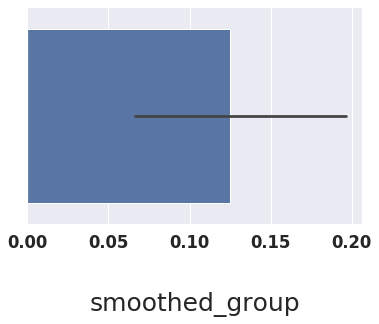

In [193]:
sns.barplot()

In [65]:
movie2_time.tail()

,ice,earth,movement,globalwarming,climate,solar,atmosphere,topic,movie,time,percent_time,smoothed_group
and we too in this movement will encounter a series of nos,0.0,0.00000,0.42323,0.00000,0.00000,0.00000,0.0,movement,2,5916.12,99.6,climate
the great american poet wallace stevens in the last century one of his lines was this after the last no comes a yes,0.0,0.00604,0.00000,0.01929,0.02210,0.00571,0.0,climate,2,5922.09,99.7,climate
and on that yes the future world depends,0.0,0.00000,0.00000,0.01908,0.02165,0.00518,0.0,climate,2,5928.06,99.8,climate
byebye guys,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,none,2,5934.03,99.9,climate
thank you,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,none,2,5940.00,100.0,climate


In [66]:
topics2 = list(movie2_time.smoothed_group.value_counts().index)
cumcounts2 = np.zeros((len(topics2),len(movie2_time)))

## Vinny's amazing code that counts
for i in range(len(movie2_time)):
    cumcounts2[:,i] = cumcounts2[:,i-1]
    k2 = topics2.index(movie2_time.smoothed_group[i])
    cumcounts2[k2,i]+=1

#topics2

In [67]:
topics2

['climate',
 'atmosphere',
 'solar',
 'earth',
 'globalwarming',
 'none',
 'ice',
 'movement']

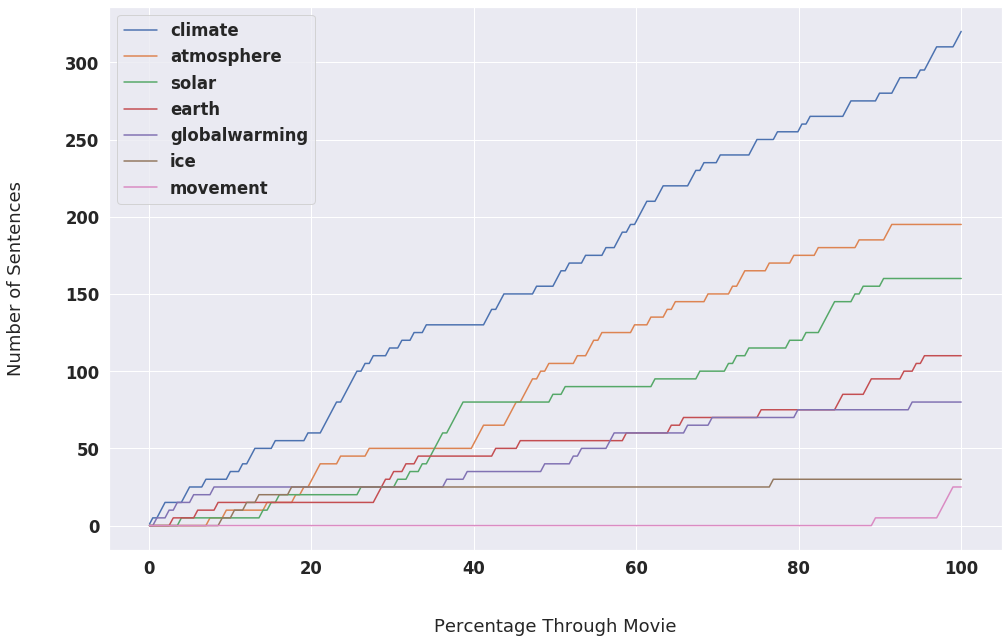

In [192]:
plt.figure(figsize=(16, 10))

ax = sns.lineplot(x = movie2_time['percent_time'], y = cumcounts2[0], label = 'climate')
ax = sns.lineplot(x = movie2_time['percent_time'], y = cumcounts2[1], label = 'atmosphere')
ax = sns.lineplot(x = movie2_time['percent_time'], y = cumcounts2[2], label = 'solar')
ax = sns.lineplot(x = movie2_time['percent_time'], y = cumcounts2[3], label = 'earth')
ax = sns.lineplot(x = movie2_time['percent_time'], y = cumcounts2[4], label = 'globalwarming')
#ax = sns.lineplot(x = movie2_time['percent_time'], y = cumcounts2[5], label = 'narration')
ax = sns.lineplot(x = movie2_time['percent_time'], y = cumcounts2[6], label = 'ice')
ax = sns.lineplot(x = movie2_time['percent_time'], y = cumcounts2[7], label = 'movement')

plt.rcParams["axes.labelsize"] = 25
plt.rcParams['axes.labelpad'] = 40 
ax.set(xlabel='Percentage Through Movie', ylabel='Number of Sentences');
#ax.set_title(' Throughout Movie', fontsize = 35, pad=40);

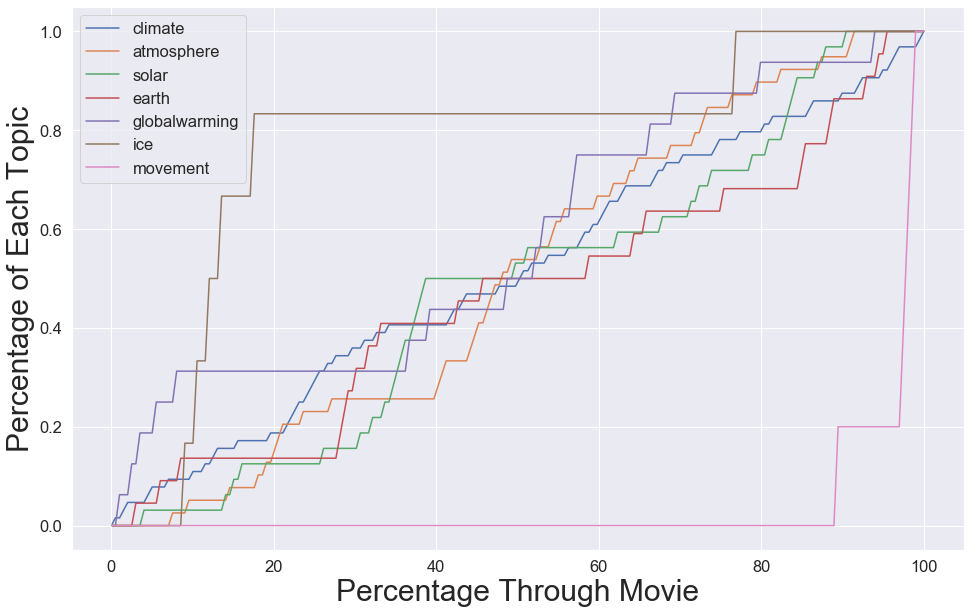

In [78]:
plt.figure(figsize=(16, 10))
ax2 = sns.lineplot(x = movie2_time['percent_time'], y = cumcounts2[0]/cumcounts2[0,-1], label = 'climate')
ax2 = sns.lineplot(x = movie2_time['percent_time'], y = cumcounts2[1]/cumcounts2[1,-1], label = 'atmosphere')
ax2 = sns.lineplot(x = movie2_time['percent_time'], y = cumcounts2[2]/cumcounts2[2,-1], label = 'solar')
ax2 = sns.lineplot(x = movie2_time['percent_time'], y = cumcounts2[3]/cumcounts2[3,-1], label = 'earth')
ax2 = sns.lineplot(x = movie2_time['percent_time'], y = cumcounts2[4]/cumcounts2[4,-1], label = 'globalwarming')
#ax2 = sns.lineplot(x = movie2_time['percent_time'], y = cumcounts2[5]/cumcounts2[5,-1], label = 'narration')
ax2 = sns.lineplot(x = movie2_time['percent_time'], y = cumcounts2[6]/cumcounts2[6,-1], label = 'ice')
ax2 = sns.lineplot(x = movie2_time['percent_time'], y = cumcounts2[7]/cumcounts2[7,-1], label = 'movement')

plt.rcParams["axes.labelsize"] = 25
ax2.set(xlabel='Percentage Through Movie', ylabel='Percentage of Each Topic');